# Sheet 11 Exercise 32 - Not complete/working
**Niklas Markert** - 1611460 / bt709885 <br>
**Lukas Thiersch** - 1607110 / bt708626


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
np.random.seed(0)

## a)

In [14]:
data = pd.read_csv('ex32_data.csv')
data.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [15]:
y = data.iloc[:, -1].to_numpy()
X = data.iloc[:, :-1].to_numpy()

In [16]:
m = X.shape[0]
test_indices = np.random.choice(m, int(0.25*m), replace=False)
all_indices = np.arange(m)
train_indices = np.setdiff1d(all_indices, test_indices)

In [17]:
train_set_x = X[train_indices].T
train_set_y = y[train_indices].reshape(-1, 1).T

In [18]:
test_set_x = X[test_indices].T
test_set_y = y[test_indices].reshape(-1, 1).T

## b)


In [19]:
def initialize_parameters(dim):
    w = np.random.randn(dim, 1)
    b = 0.
    return w, b

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:
def propagate(w, b, X, y):
    m = X.shape[1]

    # Calculate a
    z = np.dot(w.T, X) + b
    a = sigmoid(z)

    cost = - 1/m * np.sum(y * np.log(a) + (1-y) * np.log(1-a))
    if cost == np.NaN:
        cost = np.inf

    # Calculate dw, db
    dw = 1/m * np.dot(X, (a - y).T)
    db = 1/m * np.sum(a - y)

    cost = np.squeeze(cost)

    grads = {'dw': dw,
            'db': db}

    return grads, cost

In [22]:
def optimize(w, b, X, y, num_iter, learning_rate):
    costs = []

    for i in range(num_iter):
        grads, cost = propagate(w, b, X, y)

        w = w - learning_rate * grads['dw']
        b = b - learning_rate * grads['db']

        if i % 10000 == 0:
            costs.append(cost)

    params = {'w': w,
             'b': b}

    quad_euc = np.sum(grads['dw']**2) + np.sum(grads['db']**2)

    return params, grads, costs, quad_euc

In [23]:
def predict(w, b, X):
    a = sigmoid(np.dot(w.T, X) + b)
    a[a>=0.5] = 1.
    a[a<0.5] = 0.
    return a

In [24]:
def model(x_train, y_train, x_test, y_test, num_iter, learning_rate):
    n = x_train.shape[0]
    w, b = initialize_parameters(n)
    params, grads, costs, quad_euc = optimize(w, b, x_train, y_train, num_iter, learning_rate)

    y_hat_train = predict(params['w'], params['b'], x_train)
    y_hat_test = predict(params['w'], params['b'], x_test)

    print('training error: ', np.mean(np.abs(y_hat_train - y_train)))
    print('test error: ', np.mean(np.abs(y_hat_test- y_test)))

    return params, costs, quad_euc

## c)

In [25]:
num_iter = 1000001
learning_rate = 0.00025
params, costs, quad_euc = model(train_set_x, train_set_y,
                      test_set_x, test_set_y,
                      num_iter, learning_rate)
params

<ipython-input-21-b63c18eeb729>:8: RuntimeWarning: divide by zero encountered in log
  cost = - 1/m * np.sum(y * np.log(a) + (1-y) * np.log(1-a))
<ipython-input-21-b63c18eeb729>:8: RuntimeWarning: invalid value encountered in multiply
  cost = - 1/m * np.sum(y * np.log(a) + (1-y) * np.log(1-a))


training error:  0.24479166666666666
test error:  0.19270833333333334


{'w': array([[ 8.35015456e-02],
        [ 2.48360946e-02],
        [-1.70371977e-02],
        [ 5.55270026e-03],
        [-4.89815089e-04],
        [ 5.12232202e-02],
        [ 5.82139392e-01],
        [ 1.13638048e-02]]),
 'b': -5.174141104988104}

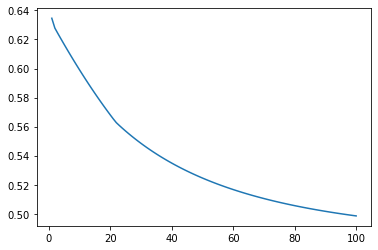

In [27]:
plt.plot(costs)


In [28]:
quad_euc


0.00011362018483130357

## d)



In [30]:
pred_test = predict(params['w'], params['b'], test_set_x)

In [32]:
cnf_matrix = metrics.confusion_matrix(np.squeeze(test_set_y), np.squeeze(pred_test))
print(cnf_matrix)

[[119  11]
 [ 26  36]]


## e)
TODO
